Apply various Regression Models for the House Price Prediction which will predict the price of the houses in future 
depending on the parameters 

Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing,
Modeling, Accuracy

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
house = pd.read_csv("house_data.csv")
house.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
#Get the shape of the dataset
house.shape

(21613, 21)

In [4]:
#Get the Description of dataset
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Get the dataframe information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#Data Cleaning
#No Null values found
#Convert object to date
house["date"] = pd.to_datetime(house["date"])

#The datatype of floors and bathrooms are float. it should be integer
house[["floors", "bathrooms"]] = house[["floors", "bathrooms"]].astype("int64")

In [7]:
#column names to Check for duplication
column_names = ["id"]
duplicates = house.duplicated(subset = column_names, keep = False)
house[duplicates]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1,1580,5000,1,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1,1580,5000,1,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3,4290,12103,1,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3,4290,12103,1,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1,1240,12092,1,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2,2680,5539,2,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1,1200,2171,1,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1,1200,2171,1,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3,2780,6000,2,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [8]:
#Sort the duplicates
house[duplicates].sort_values(by="id")
#Here the prices of some id were updated.so we need to keep the latest one and drop the old one.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.0,6,3,2400,9373,2,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2496,1000102,2014-09-16,280000.0,6,3,2400,9373,2,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
16814,7200179,2014-10-16,150000.0,2,1,840,12750,1,0,0,...,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
16815,7200179,2015-04-24,175000.0,2,1,840,12750,1,0,0,...,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
11434,109200390,2014-10-20,250000.0,3,1,1480,3900,1,0,0,...,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,2014-06-27,260000.0,2,1,700,4800,1,0,0,...,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800
15200,9834200305,2015-02-10,615000.0,3,1,1790,3876,1,0,0,...,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080
15199,9834200305,2014-07-16,350000.0,3,1,1790,3876,1,0,0,...,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080
1085,9834200885,2014-07-17,360000.0,4,2,2080,4080,1,0,0,...,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080


In [9]:
# Group by column names and produce statistical summaries
column_names = ['id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

summaries = {'date': 'max', 'price': 'max'}

house = house.groupby(by = column_names).agg(summaries).reset_index()

# Make sure aggregation is done
duplicates = house.duplicated(subset = column_names, keep = False)

house[duplicates].sort_values(by = 'id')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

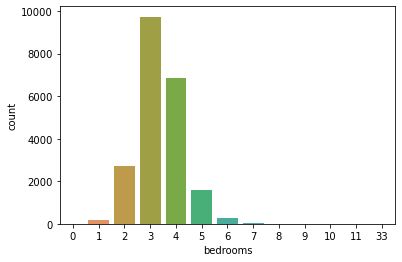

In [10]:
sns.countplot(x="bedrooms", data = house)
#houses with bedrooms preferred by customers are 3,4,2 and 5

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

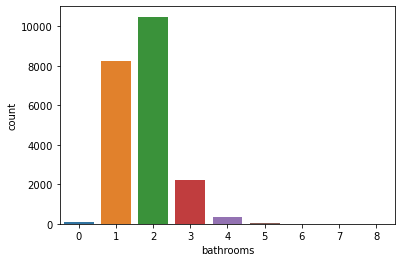

In [11]:
sns.countplot(x="bathrooms", data = house)
#houses with bathrooms preferred by customers are 2,1,3 and 4

<AxesSubplot:xlabel='floors', ylabel='count'>

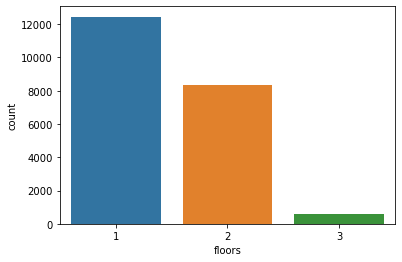

In [12]:
sns.countplot(x="floors", data = house)
#houses with floors preferred by customers are 1,2 and 3

<AxesSubplot:xlabel='view', ylabel='count'>

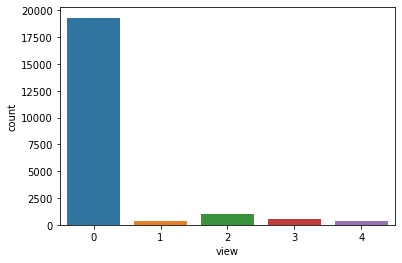

In [13]:
sns.countplot(x="view", data = house)
# Majority of customers preferred with view 0

<AxesSubplot:xlabel='grade', ylabel='count'>

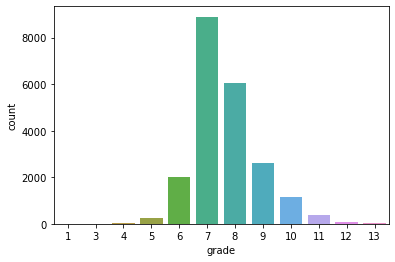

In [14]:
sns.countplot(x="grade", data = house)
## Majority of customers preferred houses with grade 7,8 ,9

<AxesSubplot:xlabel='waterfront', ylabel='count'>

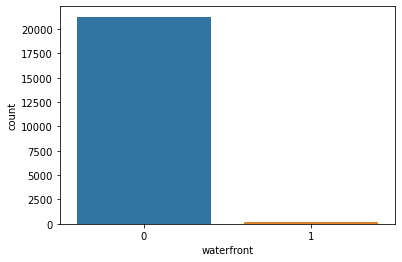

In [15]:
sns.countplot(x="waterfront", data = house)
# Majority of customers preferred with waterfront 0 and its less significant. so we can drop it

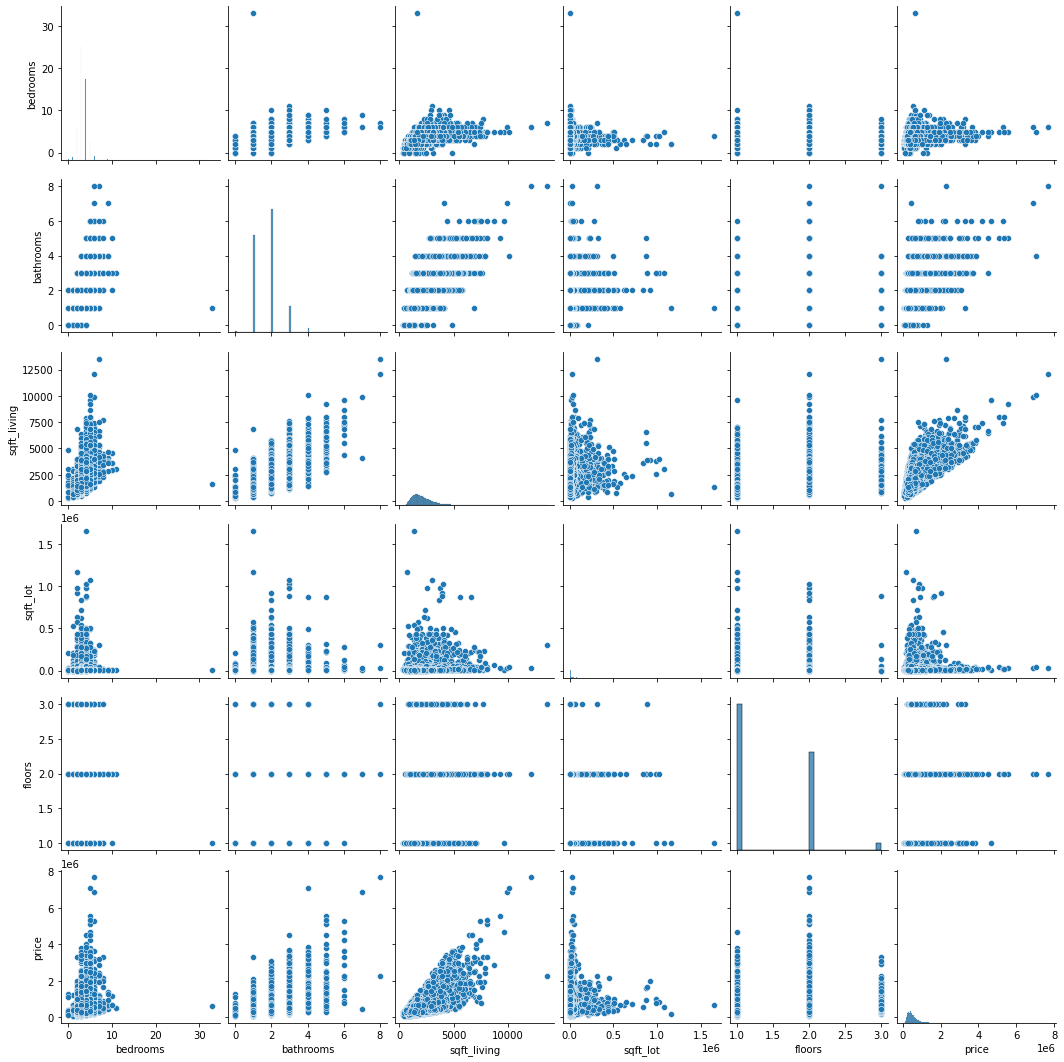

In [16]:
sns.pairplot(data=house, vars=["bedrooms", "bathrooms", "sqft_living","sqft_lot","floors","price" ])
plt.show()

In [17]:
#Drop irrelevant features
house = house.drop(["id","waterfront","sqft_living15", "sqft_lot15","date"], axis = 1)

In [18]:
correlations = house.corr()

<AxesSubplot:>

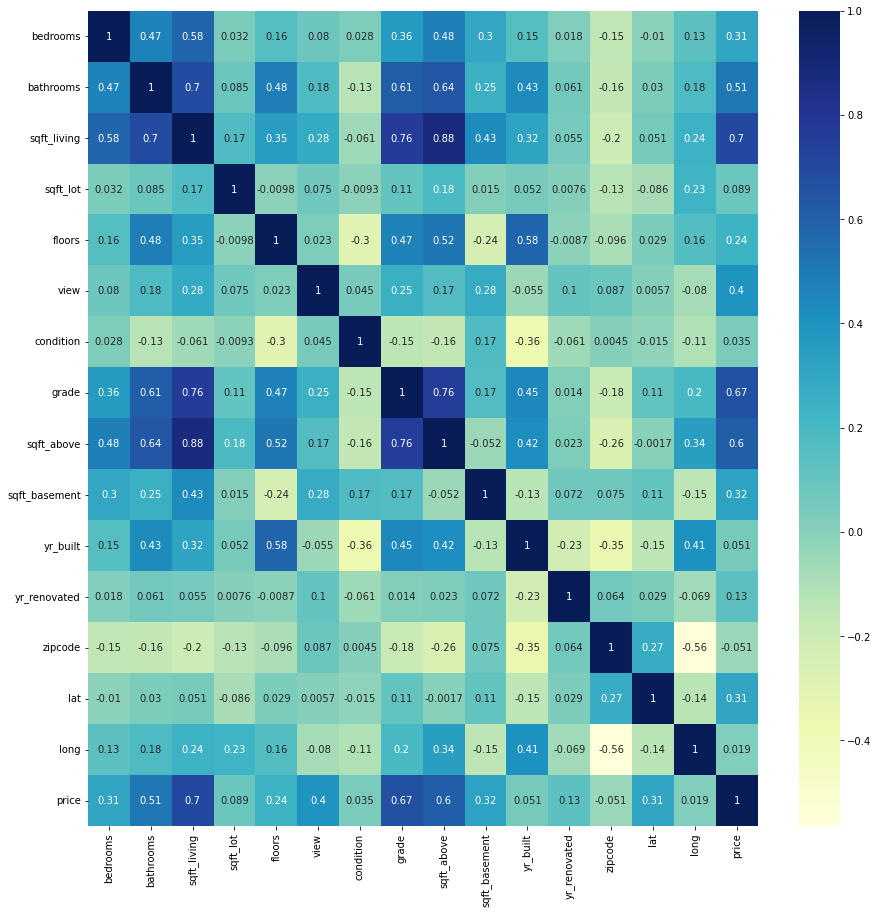

In [19]:
plt.figure(figsize =(15,15))
sns.heatmap(correlations, annot=True, cmap="YlGnBu")

In [24]:
#Import Linear Regressorion
from sklearn.linear_model import LinearRegression

# Import the module
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn.metrics import mean_squared_error as MSE

# Create X and y arrays
X = house.drop("price", axis=1).values

y = house["price"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

reg = LinearRegression()

# Fit the Regressor to the training data
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred, squared=False)

# Print the test set RMSE
print('Test set RMSE of LinearRegression: {:.2f}'.format(rmse_test))


Test set RMSE of LinearRegression: 210822.19


In [21]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)

# Instantiate dt, set 'criterion' to squared_error
dt = DecisionTreeRegressor(criterion='squared_error',random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)


# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred, squared=False)

# Print the test set RMSE
print('Test set RMSE of Decision Tree Regression: {:.2f}'.format(rmse_test))

Test set RMSE of Decision Tree Regression: 191550.36


In [22]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, random_state=1)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred, squared=False)

# Print the test set RMSE
print('Test set RMSE of Random Forest: {:.2f}'.format(rmse_test))

Test set RMSE of Random Forest: 145351.00
